<a href="https://colab.research.google.com/github/Nohyunjin/DeepLearning/blob/main/OpenCV%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%95%BD_%EB%B6%84%EB%A5%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import sklearn
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from google.colab.patches import cv2_imshow

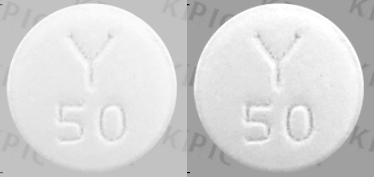

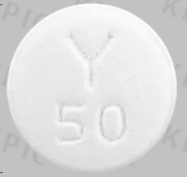

dict_items([('m00', 32728.0), ('m10', 3044439.333333333), ('m01', 2879896.0), ('m20', 377511538.6666666), ('m11', 267910325.3333333), ('m02', 337862141.6666666), ('m30', 52662861479.8), ('m21', 33221014702.666668), ('m12', 31434753011.1), ('m03', 44591891568.0), ('mu20', 94310278.1451832), ('mu11', 15291.774627238512), ('mu02', 84446076.8042858), ('mu30', -143217.99982452393), ('mu21', -907807.7306022644), ('mu12', 3291547.66189003), ('mu03', 114864.68853759766), ('nu20', 0.08804812108606969), ('nu11', 1.4276408154870352e-05), ('nu02', 0.07883889796466523), ('nu30', -7.390927426949019e-07), ('nu21', -4.684844825877616e-06), ('nu12', 1.698640528507591e-05), ('nu03', 5.927722618250923e-07)])
32728.0
731.6568541526794
0.7682709991786845


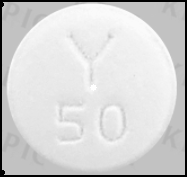

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/1.PNG', cv2.IMREAD_GRAYSCALE)

height, width = img.shape
for y in range(height):
    for x in range(width):
        if img[y,x] > 250:
            img[y,x] = 250

img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(np.c_[img, img2])

cv2_imshow(img)


ret, bin_img = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(bin_img,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

for cont in contours:
    M = cv2.moments(cont)
    area = cv2.contourArea(cont)
    length = cv2.arcLength(cont, True)
    ratio = 4 * np.pi * area / (length * length)

    print(M.items())
    print(area)
    print(length)
    print(ratio)

    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    cv2.circle(img, (center_x, center_y), 3, (255, 0, 0), -1)
    cv2.drawContours(img, [cont], 0 , (0, 0, 255), 2)

cv2_imshow(img)

In [32]:
import numpy as np

def contrast(img, low = 0, high = 255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low))
            if (temp > 255):
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else :
                img_[y][x] = temp
    return img_

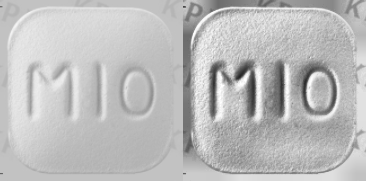

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/3.PNG', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit = 5.0, tileGridSize = (8,8))
img2 = clahe.apply(img)
cv2_imshow(np.c_[img, img2])
cv2.imwrite('trans1.png', np.c_[img, img2])

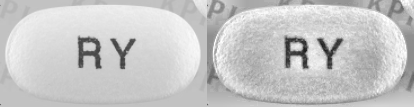

True

In [ ]:
img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/2.PNG', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit = 5.0, tileGridSize = (8,8))
img2 = clahe.apply(img)
cv2_imshow(np.c_[img, img2])
cv2.imwrite('trans1.png', np.c_[img, img2])

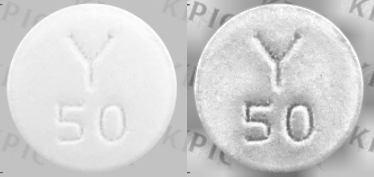

True

In [ ]:
img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/1.PNG', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit = 5.0, tileGridSize = (8,8))
img2 = clahe.apply(img)
cv2_imshow(np.c_[img, img2])
cv2.imwrite('trans1.png', np.c_[img, img2])

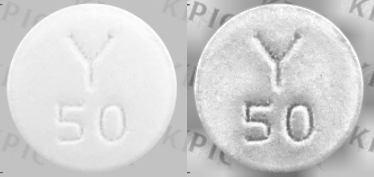

In [ ]:
img = cv2.imread('/content/trans1.png', 0)
cv2_imshow(img)

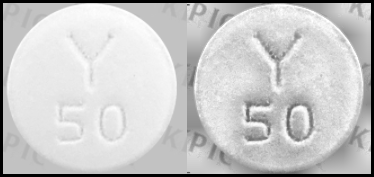

In [ ]:
contours, hierachy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

0
둘레의 길이: 724.0
원형도: 0.7847988241194979


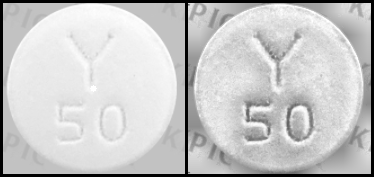

In [ ]:
contours, hierachy = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for idx, cont in enumerate(contours):
    M = cv2.moments(cont)

    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    cv2.circle(img, (center_x, center_y), 3, (255, 0, 0), -1)
    cv2.drawContours(img, [cont], 0, (0,0,255), 2)
    area = cv2.contourArea(cont)
    length = cv2.arcLength(cont, True)
    print(idx)
    print("둘레의 길이:", length)
    ratio = 4*np.pi*area / (length*length)
    print("원형도:", ratio)

cv2_imshow(img)

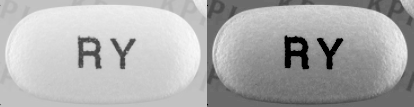

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/2.PNG', cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 150, 255)
cv2_imshow(np.c_[img, img2])
cv2.imwrite('trans2.png', np.c_[img, img2])

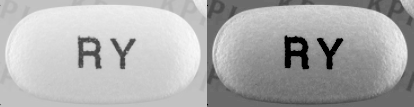

In [ ]:
img = cv2.imread('/content/trans2.png', 0)
cv2_imshow(img)

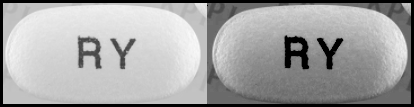

In [ ]:
contours, hierachy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

둘레의 길이: 1014.0
원형도: 0.40009172223161915


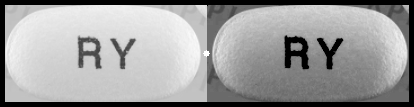

In [ ]:
contours, hierachy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cont in contours:
    M = cv2.moments(cont)

    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    cv2.circle(img, (center_x, center_y), 3, (255, 0, 0), -1)
    cv2.drawContours(img, [cont], 0, (0,0,255), 2)
    length = cv2.arcLength(cont, True)
    print("둘레의 길이:", length)
    ratio = 4*np.pi*area / (length*length)
    print("원형도:", ratio)

cv2_imshow(img)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

IMG = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/1.PNG', cv2.IMREAD_GRAYSCALE)
img = IMG.copy()

In [ ]:
canny_img = cv2.Canny(img, 45, 70, L2gr)
cv2_imshow(canny_img)

NameError: ignored

In [ ]:
cv2_imshow(canny_img)

NameError: ignored

In [ ]:
img_ = cv2.imread('/content/drive/MyDrive/data/약사진/3.PNG', cv2.IMREAD_GRAYSCALE)
img = img_.copy()
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.7, tileGridSize=(8,8))
img = clahe.apply(img)
# Binary
ret, bin_img = cv2.threshold(img, 187, 255, 0)
# contour
contours, hierachy = cv2.findContours(bin_img,
                                      cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(12,7))
plt.subplot(1,5,1)
plt.imshow(img_, cmap='gray', vmin=0, vmax=255)
plt.xlabel('origin_img')

plt.subplot(1,5,2)
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.xlabel('binary_img')

plt.subplot(1,5,3)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.xlabel('contours_img')

canny_img = cv2.Canny(image, 45, 70)
plt.subplot(1,5,4)
plt.imshow(canny_img, cmap='gray', vmin=0, vmax=255)
plt.xlabel('canny_img')

plt.subplot(1,5,5)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.xlabel('clahe_img')

plt.show()

AttributeError: ignored

In [33]:
import numpy as np

def contrast(img, low = 0, high = 255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low))
            if (temp > 255):
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else :
                img_[y][x] = temp
    return img_

In [3]:
import pandas as pd

df = pd.DataFrame(columns=["img","label"])

for i in range(1, 11):
    df = df.append(pd.DataFrame([["circle"+str(i)+".PNG", i]], columns=['img', 'label']), ignore_index = True)
print(df)

dataset_dir = '/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/'
circle_drug = df.loc[:,"img"].values

labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset

            img label
0   circle1.PNG     1
1   circle2.PNG     2
2   circle3.PNG     3
3   circle4.PNG     4
4   circle5.PNG     5
5   circle6.PNG     6
6   circle7.PNG     7
7   circle8.PNG     8
8   circle9.PNG     9
9  circle10.PNG    10


In [4]:
# 소벨 필터

def sobel(img):
    img_ = np.zeros(img.shape)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try:
                H = 1*img[y-1, x-1] + -1*img[y-1, x+1] \
                  + 2*img[y  , x-1] + -2*img[y  , x+1] \
                  + 1*img[y+1, x-1] + -1*img[y+1, x+1]

                V = 1*img[y-1, x-1] + 2*img[y-1, x] + 1*img[y-1, x+1] \
                  + -1*img[y+1, x-1] + -2*img[y+1, x] + -1*img[y+1, x+1]
                
                img_[y, x] = (np.abs(H) + np.abs(V))/2
            except:
                pass
    return img_

# 캐니 엣지

def canny(img):
    ret, bin_img = cv2.threshold(img, 210, 255, 0)

    contours, hierachy = cv2.findContours(bin_img,
                                      cv2.RETR_TREE,
                                      cv2.CHAIN_APPROX_SIMPLE)

    image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    canny_img = cv2.Canny(image, 45, 70)
    return canny_img

    # plt.imshow(canny_img, cmap='gray', vmin=0, vmax=255)
    # plt.show()

In [5]:
dataset_dir = '/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/'

In [6]:
circle_drug = df.loc[:,"img"].values
circle_drug

array(['circle1.PNG', 'circle2.PNG', 'circle3.PNG', 'circle4.PNG',
       'circle5.PNG', 'circle6.PNG', 'circle7.PNG', 'circle8.PNG',
       'circle9.PNG', 'circle10.PNG'], dtype=object)

In [18]:
labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            img_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img_.copy()

            ret, bin_img = cv2.threshold(img, 225, 255, 0)
            
            contours, hierachy = cv2.findContours(bin_img,
                                                  cv2.RETR_TREE,
                                                  cv2.CHAIN_APPROX_SIMPLE)

            image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
            image = cv2.Canny(image, 45, 70)

        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset

In [19]:
create_dataset(circle_drug)

[]

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    image = dataset[i][0]
    category = dataset[i][1]
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.xlabel(i + 1)
plt.tight_layout()    

In [7]:
# CLAHE 사용 후 임계치 설정
labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            img_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img_.copy()
            clahe = cv2.createCLAHE(clipLimit = 1.0, tileGridSize = (3,3))
            img2 = clahe.apply(img)
            ret, bin_img = cv2.threshold(img, 225, 255, 0)

            contours, hierachy = cv2.findContours(img2,
                                                  cv2.RETR_TREE,
                                                  cv2.CHAIN_APPROX_SIMPLE)

            image = cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
            image = cv2.Canny(image, 45, 70)
            # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel = np.ones((1,1), np.uint8))

        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset

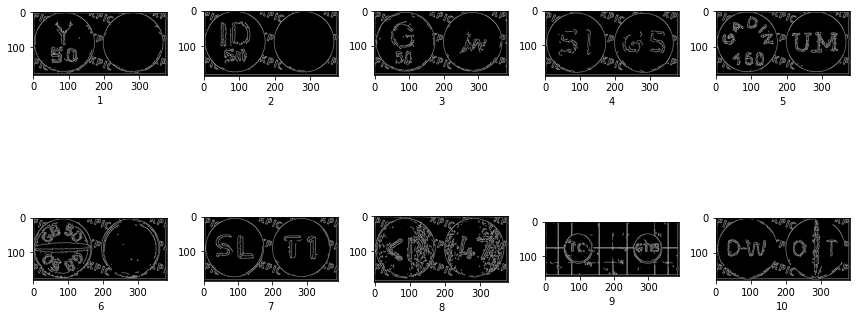

In [8]:
create_dataset(circle_drug)

plt.figure(figsize=(12,7))
for i in range(10):
    image = dataset[i][0]
    category = dataset[i][1]
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.xlabel(i + 1)
plt.tight_layout()    

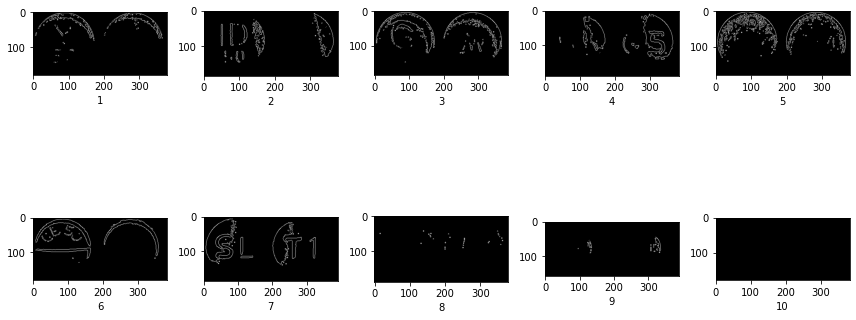

In [52]:
# cv2.blur 추가

labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            img_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img_.copy()
            img = contrast(img, 200, 255)

            # img2 = cv2.blur(img, ksize = (1,1))
            clahe = cv2.createCLAHE(clipLimit = 10.0, tileGridSize = (5,5))
            img2 = clahe.apply(img)

            contours, hierachy = cv2.findContours(img2,
                                                  cv2.RETR_TREE,
                                                  cv2.CHAIN_APPROX_SIMPLE)

            image = cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
            image = cv2.Canny(image, 45, 70)
            # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel = np.ones((1,1), np.uint8))

        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset

create_dataset(circle_drug)

plt.figure(figsize=(12,7))
for i in range(10):
    image = dataset[i][0]
    category = dataset[i][1]
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.xlabel(i + 1)
plt.tight_layout()  

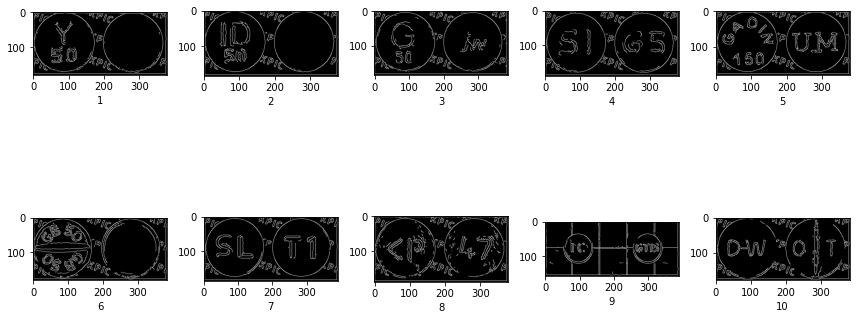

In [ ]:
# cv2.blur 추가

labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            img_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img_.copy()
            img = cv2.blur(img, ksize = (3,3))
            clahe = cv2.createCLAHE(clipLimit = 1.5, tileGridSize = (3,3))
            img2 = clahe.apply(img)

            contours, hierachy = cv2.findContours(img2,
                                                  cv2.RETR_TREE,
                                                  cv2.CHAIN_APPROX_SIMPLE)

            image = cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
            image = cv2.Canny(image, 45, 70)
            # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel = np.ones((1,1), np.uint8))
            image = cv2.equalizeHist(image)

        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset

create_dataset(circle_drug)

plt.figure(figsize=(12,7))
for i in range(10):
    image = dataset[i][0]
    category = dataset[i][1]
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.xlabel(i + 1)
plt.tight_layout()  

In [9]:
!pip install pillow
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=f6eca35ebe2f80919326a13821fcf3f076496568d6d22c75b3900ebeb0af0b29
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [10]:
import cv2
import pytesseract

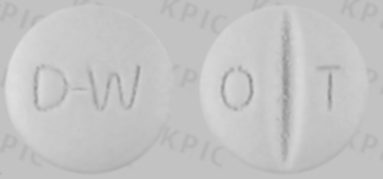

([], None)

In [27]:
# cv2.blur 추가

labels = []
dataset = []
IMAGE_SIZE = 224

def create_dataset(image_category:str):
    for label, img in enumerate(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            img_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img_.copy()
            img = cv2.blur(img, ksize = (3,3))
            clahe = cv2.createCLAHE(clipLimit = 1.5, tileGridSize = (3,3))
            img2 = clahe.apply(img)

            contours, hierachy = cv2.findContours(img2,
                                                  cv2.RETR_TREE,
                                                  cv2.CHAIN_APPROX_SIMPLE)

            image = cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
            image = cv2.Canny(image, 45, 70)
            # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel = np.ones((1,1), np.uint8))
            image = cv2.equalizeHist(image)

            h, w, c = image.shape
            boxes = pytesseract.image_to_boxes(image) 
            for b in boxes.splitlines():
                b = b.split(' ')
                img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

            
        except:
            continue

        dataset.append([np.array(image), np.array(str(label))])
    return dataset, cv2_imshow(img)

create_dataset(circle_drug)

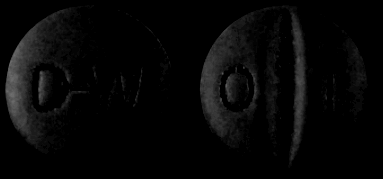

In [67]:
img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/circle10.PNG', 0)
img = contrast(img, 200, 255)
cv2_imshow(img)